In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq,df:stats.chi2.sf(chisq,df)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
path = "/home/iamchiranjeeb/Desktop/amita/Bank_data.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
df.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [4]:
df.shape


(518, 8)

In [5]:
df.isnull().sum()

Unnamed: 0       0
interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

In [7]:
data=df.copy()

In [8]:
data = data.drop(['Unnamed: 0'],axis=1)

In [9]:
data.head(3)

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no


In [10]:
data['y'] = data['y'].map({'yes':1,'no':0})

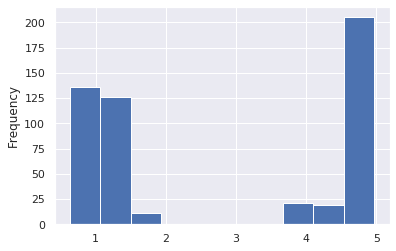

In [17]:
data['interest_rate'].plot.hist()

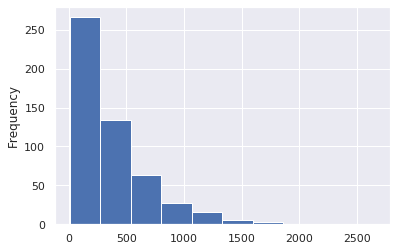

In [18]:
data['duration'].plot.hist()

In [19]:
X = data.drop(['y'],axis=1)
y = data['y']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
model = LogisticRegression(solver='lbfgs')

In [26]:
model.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predict1 = model.predict(X_test)
predict1

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [28]:
accuracy_score(y_test,predict1)

0.9134615384615384

## Method 1 Feature Selection

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
bestFeatures = SelectKBest(score_func=chi2,k=2)

In [38]:
fit = bestFeatures.fit(X,y)

In [39]:
dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(X.columns)

In [40]:
features = pd.concat([dfColumns,dfScores],axis=1)
features.columns = ['Specs','Score']

In [42]:
features #More The Score More Important

,Specs,Score
0,interest_rate,152.515984
1,credit,14.222222
2,march,12.782609
3,may,80.243781
4,previous,44.181818
5,duration,33562.020852


In [44]:
print(features.nlargest(2,'Score')) #Prints top two Important Features

           Specs         Score
5       duration  33562.020852
0  interest_rate    152.515984


## Method 2 Feature Selection

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
bestFeatures2 = ExtraTreesClassifier()
bestFeatures2.fit(X,y)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [48]:
print(bestFeatures2.feature_importances_)

[0.40359003 0.01166478 0.04796409 0.0247856  0.05281184 0.45918365]


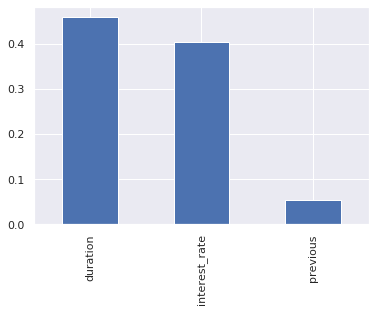

In [50]:
fitImportance = pd.Series(bestFeatures2.feature_importances_,index=X.columns)
fitImportance.nlargest(3).plot(kind='bar')
plt.show()

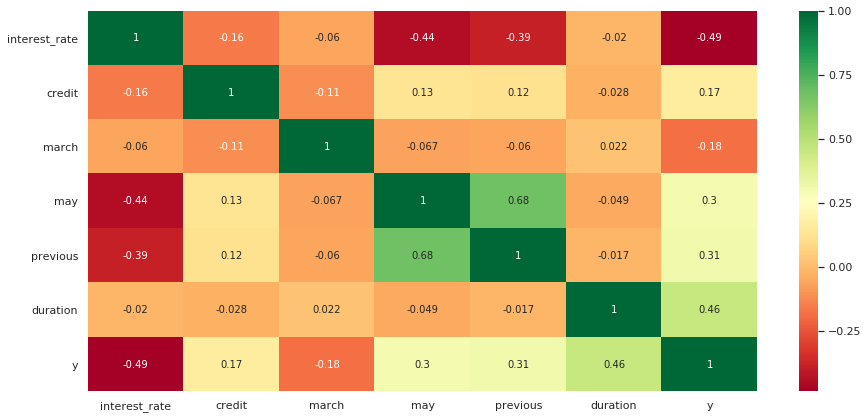

In [60]:
corrmat = data.corr()
topCorrFeature = corrmat.index
plt.figure(figsize=(15,7))
g=sns.heatmap(data[topCorrFeature].corr(),annot=True,cmap='RdYlGn')

# Model2

In [62]:
data2 = data[['interest_rate','duration','previous','y']]

In [63]:
data2.head()

,interest_rate,duration,previous,y
0,1.334,117.0,0.0,0
1,0.767,274.0,1.0,1
2,4.858,167.0,0.0,0
3,4.120,686.0,0.0,1
4,4.856,157.0,0.0,0


In [66]:
X = data2.drop(['y'],axis=1)
y=data2['y']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
model2 = LogisticRegression(solver='lbfgs')
model2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predict2 = model2.predict(X_test)
predict2

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [71]:
accuracy_score(y_test,predict2)

0.875

# Model3

In [72]:
data3 = data[['interest_rate','duration','y']]
data3.head()

,interest_rate,duration,y
0,1.334,117.0,0
1,0.767,274.0,1
2,4.858,167.0,0
3,4.120,686.0,1
4,4.856,157.0,0


In [74]:
X = data3.drop(['y'],axis=1)
y = data3['y']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [88]:
model3 = LogisticRegression(solver='lbfgs')
model3.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
predict3 = model3.predict(X_test)
predict3

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [90]:
accuracy_score(y_test,predict3)

0.8942307692307693

## Predict Some Values With Different Different Models

In [101]:
yp = model.predict([[4.56,0,1,3,0,120]])
yp

array([0])

In [103]:
yp2 = model2.predict([[4.56,120,1]])
yp2

array([0])

In [105]:
yp3 = model3.predict([[4.56,120]])
yp3

array([0])

# Printing Confusion Matrix For All Models

### Confusion Matrix Model1

In [113]:
cm1 = confusion_matrix(y_test,predict1)

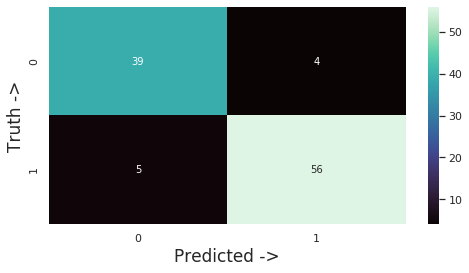

In [114]:
plt.figure(figsize=(8,4))
sns.heatmap(cm1,annot=True,cmap='mako')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [133]:
print("Missclasification Rate : ",str((5+4)/104))

Missclasification Rate :  0.08653846153846154


### Confusion Matrix Model2

In [116]:
cm2 = confusion_matrix(y_test,predict2)

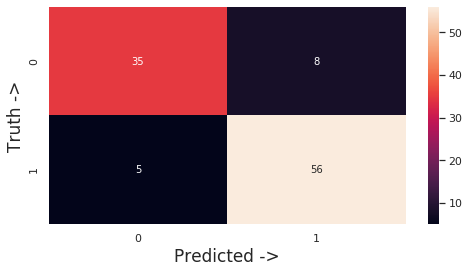

In [117]:
plt.figure(figsize=(8,4))
sns.heatmap(cm2,annot=True,cmap='rocket')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [131]:
print("Missclasification Rate : ",(5+8)/104)

Missclasification Rate :  0.125


### Confusion Matrix Model3

In [120]:
cm3 = confusion_matrix(y_test,predict3)

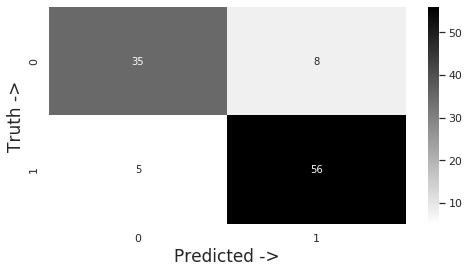

In [130]:
plt.figure(figsize=(8,4))
sns.heatmap(cm2,annot=True,cmap='binary')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [132]:
print("Missclasification Rate : ",(5+8)/104)

Missclasification Rate :  0.125
